<a href="https://colab.research.google.com/github/pomellonn/ML-algorithms/blob/main/hm_linear_models_tasks_2022_fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание - линейная регрессия

### Работа с признаками (8 баллов)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('travel insurance.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


Скачайте датасет из материалов к уроку или по ссылке https://raw.githubusercontent.com/jupiterzhuo/travel-insurance/master/travel%20insurance.csv


Описание признаков:

* Agency — название страхового агентства
* Agency Type — тип страхового агентства
* Distribution Channel — канал продвижения страхового агентства
* Product Name — название страхового продукта
* Duration — длительность поездки (количество дней)
* Destination — направление поездки
* Net Sales — сумма продаж
* Commission (in value) — комиссия страхового агентства
* Gender — пол застрахованного
* Age — возраст застрахованного

Ответ:
* Claim — потребовалась ли страховая выплата: «да» — 1, «нет» — 0

Обработайте пропущенные значения и примените написанные функции onehot_encode() и minmax_scale().

**Подсказка**: маску для категориальных признаков можно сделать фильтром cat_features_mask = (df.dtypes == "object").values

In [31]:
def minmax_scale(X):
    X = X.to_numpy().astype(float)
    if X.shape[1] > 1:
        for j in range(X.shape[1]):
            col = X[:, j]
            m = np.min(col)
            d = np.max(col) - m
            if d != 0:
                X[:, j] = (col - m) / d
            else:
                X[:, j] = 0
    elif X.shape[1] == 1:
        m = np.min(X)
        d = np.max(X) - m
        if d != 0:
            X = (X - m) / d
        else:
            X[:] = 0
    return X

def onehot_encoding(array):
    unique_values, indices = np.unique(array, return_inverse=True)
    rows = array.shape[0]
    cols = unique_values.size
    A = np.zeros((rows, cols), dtype=int)
    for i in range(rows):
        j = indices[i]
        A[i][j] = 1
    return A

df.dropna(inplace=True)

In [32]:
def map_region(country):
    europe = {'AUSTRIA', 'BELARUS', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CYPRUS',
              'CZECH REPUBLIC', 'DENMARK', 'ESTONIA', 'FINLAND', 'FRANCE',
              'GERMANY', 'HUNGARY', 'IRELAND', 'ITALY', 'LITHUANIA',
              'NETHERLANDS', 'NORWAY', 'POLAND', 'PORTUGAL', 'RUSSIAN FEDERATION',
              'SPAIN', 'SWEDEN', 'SWITZERLAND', 'UNITED KINGDOM'}

    asia = {'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH', 'BHUTAN', 'BRUNEI DARUSSALAM',
            'CAMBODIA', 'CHINA', 'HONG KONG', 'INDIA', 'INDONESIA', 'IRAN, ISLAMIC REPUBLIC OF',
            'ISRAEL', 'JAPAN', 'JORDAN', 'KOREA, REPUBLIC OF',
            "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'MACAO', 'MALAYSIA', 'MALDIVES',
            'MONGOLIA', 'MYANMAR', 'NEPAL', 'OMAN', 'PAKISTAN',
            'PHILIPPINES', 'QATAR', 'SINGAPORE', 'SRI LANKA', 'TAIWAN, PROVINCE OF CHINA',
            'THAILAND', 'TURKEY', 'TURKMENISTAN', 'UNITED ARAB EMIRATES', 'UZBEKISTAN', 'VIET NAM'}

    africa = {'ANGOLA', 'EGYPT', 'GUINEA', 'MALI', 'MAURITIUS', 'NAMIBIA', 'SOUTH AFRICA'}

    north_america = {'CANADA', 'UNITED STATES', 'MEXICO'}

    south_america = {'ARGENTINA', 'BRAZIL', 'PERU'}

    oceania = {'AUSTRALIA', 'NEW ZEALAND', 'PAPUA NEW GUINEA', 'NEW CALEDONIA', 'FRENCH POLYNESIA'}
    if country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country in africa:
        return 'Africa'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'Other'

df['DestinationRegion'] = df['Destination'].apply(map_region)
df.drop(columns=['Destination'], inplace=True)

df['Claim'] = df['Claim'].apply(lambda x: 1 if x == 'Yes' else 0)


cat_features_mask = (df.dtypes == "object").values
df_num = df.loc[:, ~cat_features_mask]
df_cat = df.loc[:, cat_features_mask]

encoded_arrays = []
encoded_colnames = []

for col in df_cat.columns:
    encoded = onehot_encoding(df_cat[col].values)
    encoded_arrays.append(encoded)
    print(col, np.shape(np.unique(df_cat[col])), np.unique(df_cat[col]))

    encoded_colnames += [f"{col}_{val}" for val in np.unique(df_cat[col])]

encoded_cat_df = pd.DataFrame(
    np.hstack(encoded_arrays),
    columns=encoded_colnames,
    index=df.index
)

df_work = pd.concat([df_num, encoded_cat_df], axis=1)



Agency (14,) ['ADM' 'ART' 'C2B' 'CBH' 'CCR' 'CSR' 'CWT' 'JWT' 'JZI' 'KML' 'LWC' 'RAB'
 'TST' 'TTW']
Agency Type (2,) ['Airlines' 'Travel Agency']
Distribution Channel (2,) ['Offline' 'Online']
Product Name (22,) ['24 Protect' 'Annual Gold Plan' 'Annual Silver Plan'
 'Annual Travel Protect Gold' 'Annual Travel Protect Platinum'
 'Annual Travel Protect Silver' 'Basic Plan' 'Bronze Plan'
 'Child Comprehensive Plan' 'Comprehensive Plan' 'Gold Plan'
 'Individual Comprehensive Plan' 'Premier Plan'
 'Rental Vehicle Excess Insurance' 'Silver Plan'
 'Single Trip Travel Protect Gold' 'Single Trip Travel Protect Platinum'
 'Single Trip Travel Protect Silver'
 'Spouse or Parents Comprehensive Plan' 'Travel Cruise Protect'
 'Travel Cruise Protect Family' 'Value Plan']
Gender (2,) ['F' 'M']
DestinationRegion (7,) ['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'Other'
 'South America']


Подробный анализ и подготовка датасета часто помогают улучшить качество модели. Ниже представлено несколько идей преобразований. Вы можете применить одно или несколько из этих преобразований (а можете не применять), чтобы помочь будущей модели.

1. Посмотрите на количественные признаки. Возможно, в некоторых признаках есть выбросы - значения, которые сильно выбиваются. Такие значения полезно удалять. Советуем присмотреться к колонке Duration)

2. Можно заметить, что one hot encoding сильно раздувает количество столбцов. Радикальное решение - можно попробовать выбросить все категориальные признаки из датасета.

3. Если все-таки оставляете категориальные признаки, то подумайте, как уменьшить количество столбцов после one hot encoding. Признаки с большим количеством значений (Duration - 149! разных стран) можно удалить или попробовать сгруппировать некоторые значения.

4. Downsampling. Датасет достаточно большой, разница в классах огромная. Можно уменьшить число наблюдений с частым ответом.

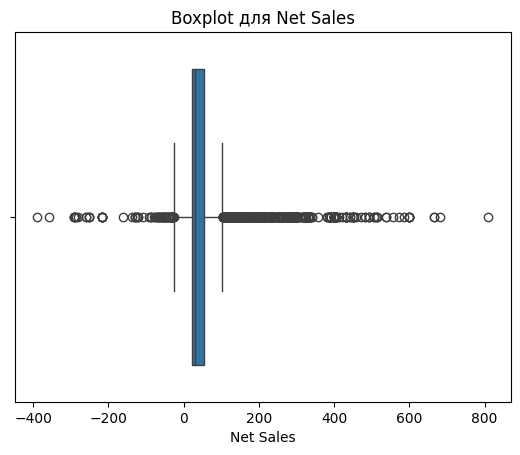

count    18219.000000
mean        57.488890
std         73.884899
min       -389.000000
25%         22.000000
50%         30.000000
75%         54.500000
max        810.000000
Name: Net Sales, dtype: float64


In [33]:

col = 'Net Sales'
sns.boxplot(x=df[col])
plt.title(f"Boxplot для {col}")
plt.show()

print(df[col].describe())


### Применение линейной регрессии (10 баллов)

Это задача классификации, но её можно решить с помощью линейной регрессии, если округлять предсказанный ответ до целого и выбирать ближайший по значению ответ из множества {0, 1}.

Вынесите признак 'Claim' в вектор ответов и разделите датасет на обучающую и тестовую выборку в соотношении 80 к 20. Зафиксируйте random_state.

**Подсказка:** быстро перевести Yes/No в 1/0 можно так - np.where(df['Claim'] == 'Yes', 1,0)

Agency — название страхового агентства
Agency Type — тип страхового агентства
Distribution Channel — канал продвижения страхового агентства
Product Name — название страхового продукта
Duration — длительность поездки (количество дней)
Destination — направление поездки
Net Sales — сумма продаж
Commission (in value) — комиссия страхового агентства
Gender — пол застрахованного
Age — возраст застрахованного

In [34]:
X = df_work.drop(columns=['Claim'])
y = df_work['Claim']
minmax_scale(X)

# разделение на test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)





Найдите аналитическое решение для обучающей выборки: обычное и регуляризацией l2.

In [35]:
class DummyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.w = None
        self.la = 1

    def fit(self, X, y):
        X,y = np.array(X), np.array(y)
        if self.fit_intercept:
          X = np.hstack([np.ones((X.shape[0], 1)), X])
        XtX = X.T @ X
        if not np.isclose(np.linalg.det(XtX), 0.0):
          self.w = np.linalg.inv(XtX) @ X.T @ y
        else:

          self.w = np.linalg.pinv(XtX) @ X.T @ y
        return self
    def fit_with_l2(self, X, y):
        X,y = np.array(X), np.array(y)
        if self.fit_intercept:
          X = np.hstack([np.ones((X.shape[0], 1)), X])

        self.w = np.linalg.inv(X.T @ X + self.la**2 * np.eye(X.shape[1])) @ X.T @ y

        return self

    def predict(self, X):
        if self.fit_intercept:
          X = np.hstack([np.ones((np.shape(X)[0], 1)), X])
        y_pred = X @ self.w

        return y_pred

    def get_weights(self):
        return self.w

In [36]:
# посчитайте аналитическое решение
model_an = DummyLinearRegression().fit(X_train, y_train)
y_pred_an = model_an.predict(X_test)




In [37]:
# посчитать аналитическое решение с регуляризацией
model_an = DummyLinearRegression().fit_with_l2(X_train, y_train)
y_pred_an_2 = model_an.predict(X_test)

Постройте модель LinearRegression, примените к тестовой выборке и посчитайте MSE (можно использовать библиотеку sklearn)

In [38]:
# обучите модель линейной регрессии LinearRegression на обучающей выборке, примените к тестовой

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)



In [39]:
# посчитайте MSE, предварительно округлив предсказанные ответы до целого
print('analytical LR, MSE:', mean_squared_error(y_test, y_pred_an.round()))
print('analytical LR with L2, MSE:', mean_squared_error(y_test, y_pred_an_2.round()))
print('sklearn LR, MSE:', mean_squared_error(y_test, y_pred.round()))

analytical LR, MSE: 0.03238199780461032
analytical LR with L2, MSE: 0.03238199780461032
sklearn LR, MSE: 0.03238199780461032


### Вывод (1 балла)

Напишите краткий вывод по заданию (достаточно пары предложений). Расскажите, какие способы предобработки данных вы выбрали и почему. Насколько хороша ваша модель?